In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [2]:
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = ['HF/butane_scan_0_neg.log', 'HF/butane_scan_0_pos.log', 'HF/butane_scan_180_neg.log',
        'HF/butane_scan_180_pos.log']

In [3]:
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

# Save pdb trajectory of scan
butane_scan.save_pdb('butane_traj.pdb')

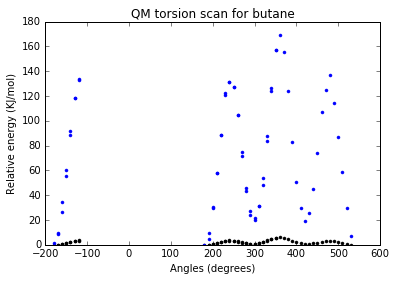

In [4]:
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.savefig('Butane_torsion_scan.pdf')
plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

When I do a torsion scan of butane in psi4, the geometry optimization of structures with dihedrals between 0 and 180 don't converge. I have no idea why. 

I tried running from -180 in the positive and negative direction:

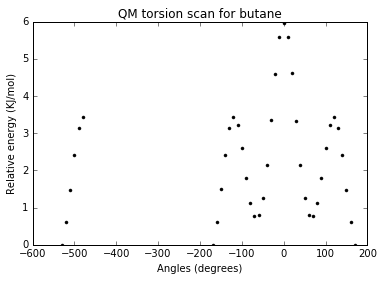

In [11]:
scan = ['HF/butane_scan_n180_neg.log', 'HF/butane_scan_n180_pos.log']
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

# save trajectory
butane_scan.save_pdb('butane_traj_n180.pdb')

plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.savefig('Butane_torsion_scan_n180.pdf')

In this case, the structures between 0 and 180 do converge. 